In [1]:
#line1
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("numpy")
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1638463447423_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…



  Running setup.py bdist_wheel for pillow: started
  Running setup.py bdist_wheel for pillow: finished with status 'error'
  Complete output from command /tmp/1638463975745-0/bin/python -u -c "import setuptools, tokenize;__file__='/mnt/tmp/pip-build-aabswi7e/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmptqg09zc6pip-wheel- --python-tag cp37:
  /usr/lib64/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'long_description_content_type'
    warnings.warn(msg)
  /usr/lib64/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'project_urls'
    warnings.warn(msg)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/BdfFontFile.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/BlpImagePlugin.py -> bui

In [2]:
#line 2
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, ArrayType
from pyspark.sql.functions import approx_count_distinct
from pyspark.sql.functions import avg
from pyspark.sql.functions import collect_set
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import count
from pyspark.sql.functions import first, last, max, min
from pyspark.sql.functions import col
from pyspark.sql.functions import array_contains
from pyspark.sql.functions import mean, count, sum, col
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import explode, split
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

unknown magic command 'matplotlib'
UnknownMagic: unknown magic command 'matplotlib'



In [3]:
#line 3 和4?
business = spark.read.json('s3://9760project2/project2_yelp/yelp_academic_dataset_business.json')
tip = spark.read.json('s3://9760project2/project2_yelp/yelp_academic_dataset_tip.json')
user = spark.read.json('s3://9760project2/project2_yelp/yelp_academic_dataset_user.json')
checkin= spark.read.json('s3://9760project2/project2_yelp/yelp_academic_dataset_checkin.json')
review = spark.read.json('s3://9760project2/project2_yelp/yelp_academic_dataset_review.json')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
#line5
rows=business.count()
print(rows)
columns = len(business.columns)
print(columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

160585
14

In [5]:
#line7
business_loc =  business.select("business_id", "name","city","state","categories")
business_loc.show(5,truncate= False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+-----------------------+-----------+-----+---------------------------------------------------------------------------------------------------------+
|business_id           |name                   |city       |state|categories                                                                                               |
+----------------------+-----------------------+-----------+-----+---------------------------------------------------------------------------------------------------------+
|6iYb2HFDywm3zjuRg0shjw|Oskar Blues Taproom    |Boulder    |CO   |Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries|
|tCbdrRPZA0oiIYSmHG3J0w|Flying Elephants at PDX|Portland   |OR   |Salad, Soup, Sandwiches, Delis, Restaurants, Cafes, Vegetarian                                           |
|bvN78flM8NLprQ1a1y5dRg|The Reclaimory         |Portland   |OR   |Antiques, Fashion, Used, Vintage & Consignment, Shopping, Furniture S

In [6]:
#line 8&9

from pyspark.sql.functions import explode, split

df=business_loc.select("business_id","categories")
df_exploded = df.withColumn("category",explode(split("categories",","))).drop("categories")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
#line10
df_exploded.show(5,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+-------------+
|business_id           |category     |
+----------------------+-------------+
|6iYb2HFDywm3zjuRg0shjw|Gastropubs   |
|6iYb2HFDywm3zjuRg0shjw| Food        |
|6iYb2HFDywm3zjuRg0shjw| Beer Gardens|
|6iYb2HFDywm3zjuRg0shjw| Restaurants |
|6iYb2HFDywm3zjuRg0shjw| Bars        |
+----------------------+-------------+
only showing top 5 rows

In [8]:
#line11
df_exploded.select('category').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2487

In [9]:
#line12
df_exploded.groupby('category').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Paddleboarding|   12|
|     Dermatologists|   68|
|              Tires| 1456|
|   Historical Tours|   60|
|              Hakka|    4|
|        Hobby Shops|  135|
|         Bubble Tea|  184|
|            Tanning|  147|
|            Propane|   83|
|           Handyman|   87|
|           Macarons|   50|
|           Japanese| 2039|
| Convenience Stores| 1340|
|        Car Dealers| 1013|
|            Lawyers|  422|
|       IV Hydration|   47|
|            Rolfing|   28|
|            Falafel|   19|
|           Psychics|   62|
|    Tasting Classes|   40|
+-------------------+-----+
only showing top 20 rows

In [10]:
#line13
bar = df_exploded.groupby('category').count().orderBy("count",ascending=False)
bar.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|36340|
|                Food|22094|
|            Shopping|20056|
|         Restaurants|14423|
|       Home Services|12001|
|       Beauty & Spas|11633|
|    Health & Medical|11390|
|           Nightlife| 9808|
|      Local Services| 9299|
|                Bars| 8914|
| Event Planning &...| 7617|
|                Food| 7375|
|         Active Life| 7039|
|          Automotive| 6785|
|            Shopping| 6149|
|        Coffee & Tea| 5735|
|          Sandwiches| 5697|
| American (Tradit...| 5235|
|             Fashion| 5231|
|       Beauty & Spas| 4941|
+--------------------+-----+
only showing top 20 rows

In [11]:
#line14
bar_pandas = bar.limit(20).toPandas()
bar_pandas

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                      category  count
0                  Restaurants  36340
1                         Food  22094
2                     Shopping  20056
3                  Restaurants  14423
4                Home Services  12001
5                Beauty & Spas  11633
6             Health & Medical  11390
7                    Nightlife   9808
8               Local Services   9299
9                         Bars   8914
10   Event Planning & Services   7617
11                        Food   7375
12                 Active Life   7039
13                  Automotive   6785
14                    Shopping   6149
15                Coffee & Tea   5735
16                  Sandwiches   5697
17      American (Traditional)   5235
18                     Fashion   5231
19               Beauty & Spas   4941

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

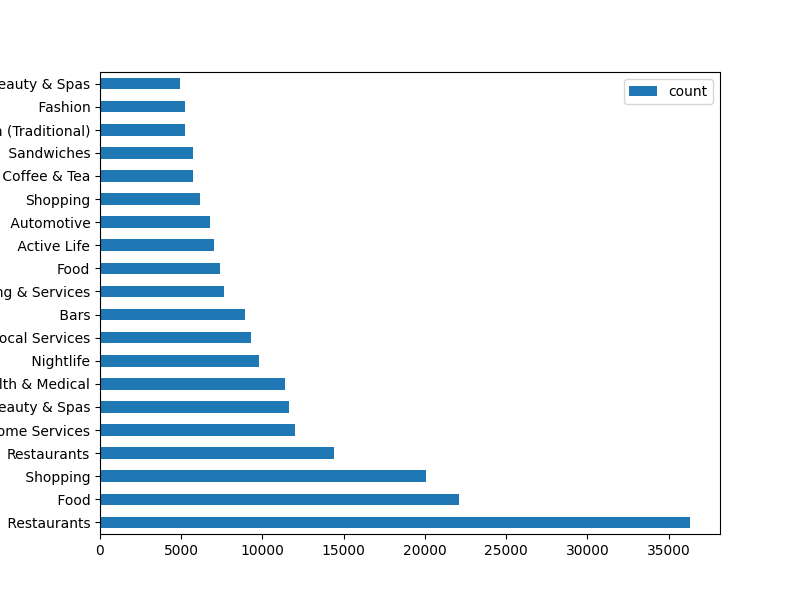

In [12]:
#line15
plt.figure(figsize=(10,6))
bar_pandas.plot(kind="barh", x="category", figsize=(8,6))

%matplot plt

In [13]:
#line 16
new_rows=review.count()
print(new_rows)
columns = len(review.columns)
print(columns)
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8635403
9
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [14]:
#line 17 不知道对不对
review =  review.select("business_id","stars")
review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [15]:
#line18
review_dataset= review.groupby("business_id").avg("stars").alias("avg(stars)").sort(col("avg(stars)").desc())
review_dataset.show(5,truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+----------+
|business_id           |avg(stars)|
+----------------------+----------+
|4lFIFqycDhV8KQGTFzoEAg|5.0       |
|jZBhw30QecAQNDtpMTSwkA|5.0       |
|_elpnSyXg14LffDRH6HD2w|5.0       |
|j63ReWJhgerb-7em4brmbA|5.0       |
|sxSc6amhnvXbKbaZaqDJLA|5.0       |
+----------------------+----------+
only showing top 5 rows

In [16]:
#line 19
business_loc= business.select("business_id", "name","city","state","categories","stars")
joined_data = review_dataset.join(business_loc,review_dataset.business_id == business_loc.business_id)#.join(review,review.business_id==review_dataset.business_id)

joined_data.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+--------------------+--------------------+----------+-----+--------------------+-----+
|         business_id|       avg(stars)|         business_id|                name|      city|state|          categories|stars|
+--------------------+-----------------+--------------------+--------------------+----------+-----+--------------------+-----+
|R0IJhEI-zSJpYT1YN...|3.606060606060606|R0IJhEI-zSJpYT1YN...|        Nails Studio|    Dedham|   MA|Nail Salons, Waxi...|  3.5|
|wdBrDCbZopowEkIEX...|4.538461538461538|wdBrDCbZopowEkIEX...|Beacon Hill Shoe ...|    Boston|   MA|Local Services, S...|  4.5|
|2boQDeHxopolPtJhV...|4.333333333333333|2boQDeHxopolPtJhV...| Eric Hollander, DDS|    Austin|   TX|Oral Surgeons, En...|  4.5|
|bOnsvrz1VkbrZM1jV...|              3.8|bOnsvrz1VkbrZM1jV...|Fresh Touch Cleaners|Winchester|   MA|Local Services, D...|  4.0|
|XzXcpPCb8Y5huklEN...|4.666666666666667|XzXcpPCb8Y5huklEN...|       Donna & Toots|  Portland|   OR|   Shopping,

In [17]:
#line20
final_data=joined_data.drop("business_id","categories")
final_data.show(5)
#joined_data = joined_data.select("avg(stars)","stars","name","city","state")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+--------------------+----------+-----+-----+
|       avg(stars)|                name|      city|state|stars|
+-----------------+--------------------+----------+-----+-----+
|3.606060606060606|        Nails Studio|    Dedham|   MA|  3.5|
|4.538461538461538|Beacon Hill Shoe ...|    Boston|   MA|  4.5|
|4.333333333333333| Eric Hollander, DDS|    Austin|   TX|  4.5|
|              3.8|Fresh Touch Cleaners|Winchester|   MA|  4.0|
|4.666666666666667|       Donna & Toots|  Portland|   OR|  4.5|
+-----------------+--------------------+----------+-----+-----+
only showing top 5 rows

In [18]:
#line 21
final_data2 = final_data.withColumn("cal_col",((final_data['avg(stars)'] - final_data['stars']) / final_data['stars'])).drop("avg(stars)","stars")
final_data2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+-----+--------------------+
|                name|           city|state|             cal_col|
+--------------------+---------------+-----+--------------------+
|        Nails Studio|         Dedham|   MA|0.030303030303030276|
|Beacon Hill Shoe ...|         Boston|   MA|0.008547008547008517|
| Eric Hollander, DDS|         Austin|   TX|-0.03703703703703...|
|Fresh Touch Cleaners|     Winchester|   MA|-0.05000000000000...|
|       Donna & Toots|       Portland|   OR|0.037037037037037104|
|              Subway|       Portland|   OR|-0.01999999999999...|
|Ruiz Branch - Aus...|         Austin|   TX|0.050000000000000044|
|    GibsonBreen & Co|        Atlanta|   GA|                 0.0|
|True Glow | Buckhead|        Atlanta|   GA|0.037037037037037104|
|Brookline Adult &...|      Brookline|   MA|-0.05357142857142857|
|Robert T Franklin...|      Beaverton|   OR|                 0.0|
|             Wendy's|New Westminster|   BC|                 0.0|
|Tarrytown

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

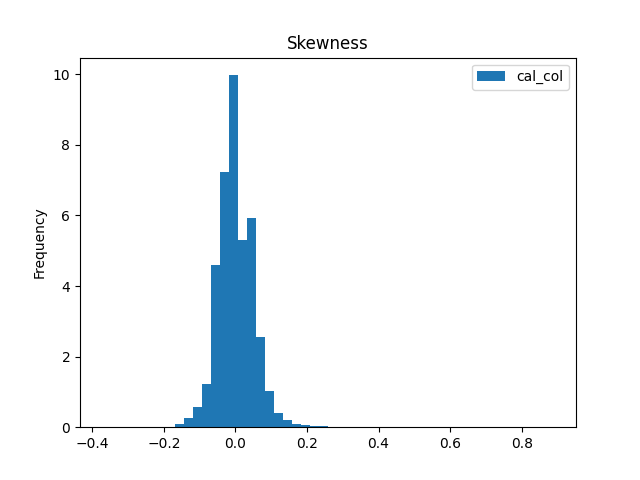

In [19]:
#line22   #看起来slightly right skewed

final_data2.toPandas().plot(kind="hist",bins=50,title="Skewness",density=True,linestyle = "dashed",linewidth = 1)
%matplot plt

In [20]:
user_data_ = user.select("user_id","fans","useful")
user_data_.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+----+------+
|user_id               |fans|useful|
+----------------------+----+------+
|q_QQ5kBBwlCcbL1s4NVK3g|1357|15038 |
|dIIKEfOgo0KqUfGQvGikPg|1025|21272 |
|D6ErcUnFALnCQN4b1W_TlA|16  |188   |
|JnPIjvC0cmooNDfsa9BmXg|420 |7234  |
|37Hc8hr3cw0iHLoPzLK6Ow|47  |1577  |
|n-QwITZYrXlKQRiV30MqNg|17  |476   |
|eCJoZqpV1fDKJGAsXmWXqQ|1   |53    |
|cojecOwQJpsYDxnjtgzteQ|4   |136   |
|1jXmzuIFKxTnEnR0pxO0Hg|23  |381   |
|-8QoOIfvwwxJ4sY201WP5A|25  |752   |
|EtofuImujQBSo02xa6ZRtQ|5   |159   |
|cxS6dbjyPgPS1S890u_khA|2   |116   |
|MUzkXfPS9JaMgJ907orz0g|86  |2235  |
|tjwblGkWN9m0vsGaypJ0Vw|44  |1469  |
|m-zIVssiXN4bnDFqMdPtEA|0   |6     |
|fxqvyXlml4400BglsxRG_w|38  |903   |
|9edAbpniyhHFdpAvknQPBg|48  |1532  |
|wURnB9fRNGAli13yBwhENA|6   |235   |
|l4P65LXNBnJqI7oTXdBvGg|9   |419   |
|9RIXlhUb_xEVuc_o0QsT0w|2   |44    |
+----------------------+----+------+
only showing top 20 rows

In [21]:
review = spark.read.json('s3://9760project2/project2_yelp/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
review_data_ = review.select("user_id","useful").withColumnRenamed("useful","users_liked_post").withColumnRenamed("user_id","new_user_id")
review_data_.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+----------------+
|new_user_id           |users_liked_post|
+----------------------+----------------+
|ak0TdVmGKo4pwqdJSTLwWw|3               |
|YoVfDbnISlW0f7abNQACIg|1               |
|eC5evKn1TWDyHCyQAwguUw|0               |
|SFQ1jcnGguO0LYWnbbftAA|1               |
|0kA0PAJ8QFMeveQWHFqz2A|0               |
|RNm_RWkcd02Li2mKPRe7Eg|2               |
|Q8c91v7luItVB0cMFF_mRA|0               |
|XGkAG92TQ3MQUKGX9sLUhw|0               |
|LWUnzwK0ILquLLZcHHE1Mw|1               |
|99RsBrARhhx60UnAC4yDoA|0               |
|eLAYHxHUutiXswy-CfeiUw|0               |
|Ngl83gs3n22SzLAsNw2znw|3               |
|hn0ZbitvmlHnF--KJGJ6_A|0               |
|B7YSV6r1ePAXc69FkDDuZw|0               |
|xpxWG7jQXZE6BcSeuIq4PQ|0               |
|HvpNr0ohHCaVLp014CQrdw|0               |
|bUHweiErUJ36WGeNrPmEbA|5               |
|JHXQEayrDHOWGexs0dCviA|0               |
|DECuRZwkUw8ELQZfNGef2Q|0               |
|jySmPCkEkJR3cWJlkEs9cw|5               |
+----------------------+----------

In [23]:
line_23 = user_data_.join(review_data_,review_data_.new_user_id == user_data_.user_id).drop("new_user_id").drop("fans")
line_23.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+------+----------------+
|user_id               |useful|users_liked_post|
+----------------------+------+----------------+
|--1UpCuUDJQbqiuFXkOzaw|14    |1               |
|--3Bk72HakneTyp3DEjecg|11    |0               |
|--3Hl2oAvTPlq-f7KtogJg|14    |0               |
|--3Hl2oAvTPlq-f7KtogJg|14    |0               |
|--3Hl2oAvTPlq-f7KtogJg|14    |1               |
|--3Hl2oAvTPlq-f7KtogJg|14    |1               |
|--5FEgQNB3_7WtjxkCsGqA|4     |1               |
|--5FEgQNB3_7WtjxkCsGqA|4     |0               |
|--5FEgQNB3_7WtjxkCsGqA|4     |0               |
|--5FEgQNB3_7WtjxkCsGqA|4     |1               |
|--5FEgQNB3_7WtjxkCsGqA|4     |0               |
|--5FEgQNB3_7WtjxkCsGqA|4     |1               |
|--DCpT4hVZNRpRx572pkEw|2     |0               |
|--DCpT4hVZNRpRx572pkEw|2     |0               |
|--Hh_cXFJJUqYB2STxz1vw|0     |0               |
|--IpFJ0EzvdepaxP47X5eg|3     |0               |
|--IpFJ0EzvdepaxP47X5eg|3     |2               |
|--IpFJ0EzvdepaxP47X

In [24]:
final_data__ = line_23.withColumn("useful_ ",(line_23['useful']/ line_23['users_liked_post'])).drop("useful","users_liked_post").dropna()
final_data__.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|             user_id|          useful_ |
+--------------------+------------------+
|--1UpCuUDJQbqiuFX...|              14.0|
|--3Hl2oAvTPlq-f7K...|              14.0|
|--3Hl2oAvTPlq-f7K...|              14.0|
|--5FEgQNB3_7Wtjxk...|               4.0|
|--5FEgQNB3_7Wtjxk...|               4.0|
|--5FEgQNB3_7Wtjxk...|               4.0|
|--IpFJ0EzvdepaxP4...|               1.5|
|--IpFJ0EzvdepaxP4...|               3.0|
|-0-cCufup-5zSCtC9...|               1.0|
|-03gNm8GRPNfgPD4_...|               5.0|
|-03gNm8GRPNfgPD4_...|               5.0|
|-04oKvKUjD6p-wgjU...| 5.651162790697675|
|-08_7TyKsYwY_Jxhg...|               3.0|
|-0CYm85fllm43U7UQ...|               4.0|
|-0PJyCuCFCuUk7_TS...|1.3333333333333333|
|-0PrUwCtOxcoqbvxN...|               2.5|
|-0PrUwCtOxcoqbvxN...|1.6666666666666667|
|-0vUEEyCtW0fE5NL5...|               4.0|
|-12phdDdJ0OpoRVf1...|               6.0|
|-1CV3L7RAk34790wX...|              66.0|
+--------------------+------------

In [25]:
bar_pandas = final_data__.limit(20).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

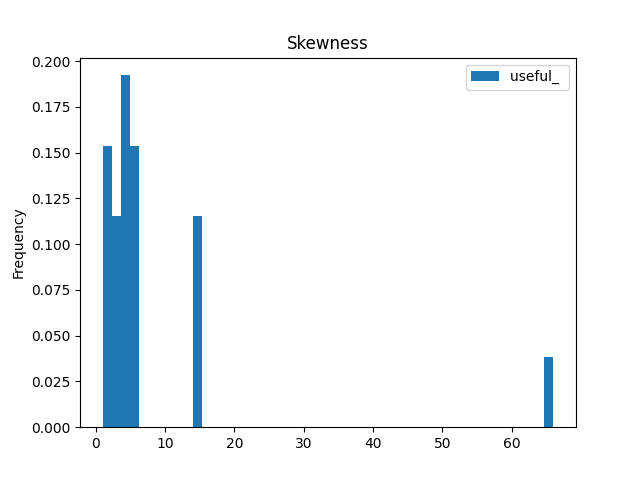

In [26]:
bar_pandas.plot(kind="hist",bins=50,title="Skewness",density=True,linestyle = "dashed",linewidth = 1)
%matplot plt